In [3]:
# importing libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from scipy import stats
import numpy as np 
import pandas as pd
from keras import layers, regularizers

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import warnings

from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, Dense, Dropout, MaxPooling1D,  Input, Bidirectional, Conv1D, concatenate, Permute
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet import MobileNet

from tensorflow.keras.layers import Concatenate, Add, GlobalMaxPooling1D, Attention,Activation
from keras import regularizers
from keras import layers, regularizers

from scipy import stats
import numpy as np
import pandas as pd
from sklearn import metrics

from scipy import stats
import numpy as np
import pandas as pd
from sklearn import metrics

from tensorflow.keras.layers import Conv1D, BatchNormalization, Activation, MaxPooling1D, LSTM, Bidirectional, Permute, Concatenate, Attention, Input, Dense, Dropout, Multiply, Reshape
from tensorflow.keras import regularizers, Model
from tensorflow.keras.layers import Concatenate, Add, GlobalMaxPooling1D, Attention,Activation
from keras import regularizers
from keras import layers, regularizers
from sklearn.model_selection import train_test_split

In [20]:
mypath = 'Train.csv'
df = pd.read_csv(mypath)
df.head()

,eventID,hr,rawData,label
0,5635,75,426.0,1
1,5635,75,2267.0,1
2,5635,75,2002.0,1
3,5635,75,4090.0,1
4,5635,75,3057.0,1


In [7]:
# Count occurrences of each unique eventID
event_counts = df['eventID'].value_counts().reset_index()
event_counts.columns = ['eventID', 'Datapoints']

# Count number of unique eventID
unique_event_count = len(event_counts)

# Add a new column that divides occurrences by 125
event_counts['SubEvents'] = event_counts['Datapoints'] / 125

# Multiply SubEvents by 5 and format as hh:mm:ss
event_counts['SubEvents_times_5'] = event_counts['SubEvents'] * 5
event_counts['SubEvents_times_5_formatted'] = pd.to_timedelta(event_counts['SubEvents_times_5'], unit='s').apply(lambda x: '{:0>8}'.format(str(x))).astype(str)

# Sort by eventID
event_counts = event_counts.sort_values(by='eventID')
event_counts.head()

,eventID,Datapoints,SubEvents,SubEvents_times_5,SubEvents_times_5_formatted
100,115,3625,29.0,145.0,0 days 00:02:25
104,119,3500,28.0,140.0,0 days 00:02:20
37,407,3750,30.0,150.0,0 days 00:02:30
99,764,3625,29.0,145.0,0 days 00:02:25
2,1046,4250,34.0,170.0,0 days 00:02:50


In [8]:
df = event_counts

# Calculate total number of unique eventID
total_eventID = df['eventID'].nunique()

# Sum the number of Datapoints
total_datapoints = df['Datapoints'].sum()

# Sum the number of SubEvents
total_subevents = df['SubEvents'].sum()

# Compute overall duration of each row combined
overall_duration = df['SubEvents'].sum() * 5  # Assuming each SubEvent duration is 5 seconds

print("Total number of eventID:", total_eventID)
print("Total number of Datapoints:", total_datapoints)
print("Total number of SubEvents:", total_subevents)
print("Overall duration of each row combined (hh:mm:ss):", pd.to_timedelta(overall_duration, unit='s'))

Total number of eventID: 139
Total number of Datapoints: 493625
Total number of SubEvents: 3949.0
Overall duration of each row combined (hh:mm:ss): 0 days 05:29:05


In [32]:
from sklearn.model_selection import train_test_split
import numpy as np

# Define the specific event IDs to include in the test set
specific_eventIDs = [5610, 8800, 1159, 5287, 9401, 14157]

# Split the data into train and test sets
unique_eventIDs = df['eventID'].unique()
train_eventIDs, test_eventIDs = train_test_split(unique_eventIDs, test_size=0.30, random_state=RANDOM_SEED)

# Concatenate specific event IDs with the test set event IDs
test_eventIDs = np.concatenate((test_eventIDs, specific_eventIDs))

# Filter data based on event ID for train and test sets
train_data = df[df['eventID'].isin(train_eventIDs)]
test_data = df[df['eventID'].isin(test_eventIDs)]

# Separate features and labels for train and test sets
X_train = train_data.drop(columns=['label']).values
y_train = pd.get_dummies(train_data['label']).values
X_test = test_data.drop(columns=['label']).values
y_test = pd.get_dummies(test_data['label']).values

# Print the shape of train and test sets
print("Train set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)



# Concatenate specific event IDs with the test set event IDs
all_test_eventIDs = np.concatenate((test_eventIDs, specific_eventIDs))

# Print all event IDs in the test set, including predefined events
print("Event IDs in the test set:")
print(all_test_eventIDs)

Train set shape: (346750, 3) (346750, 3)
Test set shape: (162125, 3) (162125, 3)
Event IDs in the test set:
[ 7775  6732  6767 21569 36812  5891 21865 21866 12206 21886  7006  8738
 45208  9828 26077  7258  5745 31404 45209  6587  7365 53666  9627 31421
  7125  9475  6808 41062 36872  7357  7126   764 15039  9470  6998 42626
  5705 15230  9005  7772 15208  8661  5610  8800  1159  5287  9401 14157
  5610  8800  1159  5287  9401 14157]


In [37]:
import numpy as np

# Sort the array in ascending order
sorted_event_ids = np.sort(all_test_eventIDs)

# Print the event IDs in ascending order
for event_id in sorted_event_ids:
    print("*****",event_id,"*****")
    
x=len(sorted_event_ids)
print(x)

***** 764 *****
***** 1159 *****
***** 1159 *****
***** 5287 *****
***** 5287 *****
***** 5610 *****
***** 5610 *****
***** 5705 *****
***** 5745 *****
***** 5891 *****
***** 6587 *****
***** 6732 *****
***** 6767 *****
***** 6808 *****
***** 6998 *****
***** 7006 *****
***** 7125 *****
***** 7126 *****
***** 7258 *****
***** 7357 *****
***** 7365 *****
***** 7772 *****
***** 7775 *****
***** 8661 *****
***** 8738 *****
***** 8800 *****
***** 8800 *****
***** 9005 *****
***** 9401 *****
***** 9401 *****
***** 9470 *****
***** 9475 *****
***** 9627 *****
***** 9828 *****
***** 12206 *****
***** 14157 *****
***** 14157 *****
***** 15039 *****
***** 15208 *****
***** 15230 *****
***** 21569 *****
***** 21865 *****
***** 21866 *****
***** 21886 *****
***** 26077 *****
***** 31404 *****
***** 31421 *****
***** 36812 *****
***** 36872 *****
***** 41062 *****
***** 42626 *****
***** 45208 *****
***** 45209 *****
***** 53666 *****
54


In [16]:
from sklearn.model_selection import train_test_split
from keras.optimizers import RMSprop
from scipy import stats
import numpy as np
import pandas as pd

RANDOM_SEED = 333    
N_TIME_STEPS = 125   # 50 records in each sequence
N_FEATURES = 2      # mag,hr,roi_Ratio,output
step = 100           # window overlap = 50 -10 = 40  (80% overlap)
N_CLASSES = 3       # class labels

# Split the data into train and test sets
unique_eventIDs = df['eventID'].unique()
train_eventIDs, test_eventIDs = train_test_split(unique_eventIDs, test_size=0.30, random_state=RANDOM_SEED)

# Filter data based on eventID for train and test sets
train_data = df[df['eventID'].isin(train_eventIDs)]
test_data = df[df['eventID'].isin(test_eventIDs)]

# Separate features and labels for train and test sets
X_train = train_data.drop(columns=['label']).values
y_train = pd.get_dummies(train_data['label']).values
X_test = test_data.drop(columns=['label']).values
y_test = pd.get_dummies(test_data['label']).values

# Print the shape of train and test sets
print("Train set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

# Print all event IDs in the test set
print("Event IDs in the test set:")
print(test_eventIDs)


KeyError: "['label'] not found in axis"

In [ ]:
from keras.optimizers import RMSprop
from scipy import stats
import numpy as np
import pandas as pd

RANDOM_SEED = 333    
N_TIME_STEPS = 125   # 50 records in each sequence
N_FEATURES = 2      # mag,hr,roi_Ratio,output
step = 100           # window overlap = 50 -10 = 40  (80% overlap)
N_CLASSES = 3       # class labels
segments = []
labels = []

for i in range(0, df.shape[0] - N_TIME_STEPS, step):  
    mag = df['rawData'].values[i: i + N_TIME_STEPS]
    hr = df['hr'].values[i: i + N_TIME_STEPS]
    segement = np.column_stack((mag, hr))  # Stack acceleration and heart rate features horizontally
    label = stats.mode(df['label'][i: i + N_TIME_STEPS])[0][0]
    segments.append(segement)
    labels.append(label)

# Convert segments and labels to numpy arrays
segments = np.asarray(segments, dtype=np.float32)
labels = np.asarray(pd.get_dummies(labels), dtype=np.float32)

NameError: name 'df' is not defined

In [ ]:
# Get unique eventIDs in the entire dataset
unique_eventIDs = df['eventID'].unique()

# Split the unique eventIDs into train and test sets
train_eventIDs = unique_eventIDs[:int(len(unique_eventIDs) * 0.7)]  # 70% of unique eventIDs for training
test_eventIDs = unique_eventIDs[int(len(unique_eventIDs) * 0.7):]   # Remaining 30% for testing

# Filter data based on eventID for train and test sets
train_data = df[df['eventID'].isin(train_eventIDs)]
test_data = df[df['eventID'].isin(test_eventIDs)]

# Separate features and labels for train and test sets
X_train = train_data[['hr', 'rawData']].values  # Assuming 'hr' and 'rawData' are features
y_train = train_data['label'].values           # Assuming 'label' is the target variable
X_test = test_data[['hr', 'rawData']].values
y_test = test_data['label'].values



In [ ]:
print("Number of unique eventIDs in train dataset:", len(np.sort(train_data['eventID'].unique())))
print("EventIDs in train dataset:", np.sort(train_data['eventID'].unique()))

print("\nNumber of unique eventIDs in test dataset:", len(np.sort(test_data['eventID'].unique())))
print("EventIDs in test dataset:", np.sort(test_data['eventID'].unique()))

Number of unique eventIDs in train dataset: 97
EventIDs in train dataset: [  115   119   764  1046  4924  5254  5288  5635  5637  5705  5721  5745
  5889  5891  6476  6668  6717  6732  6761  6767  6808  6815  6840  6847
  6884  6886  6897  6998  7006  7007  7219  7222  7258  7262  7357  7363
  7365  7434  7772  7775  7823  8420  8726  8738  8800  8875  8960  8970
  8998  9005  9401  9470  9475  9828 11587 11591 12618 12624 12629 12973
 14101 14157 14159 15039 15417 15923 17219 21561 21569 21603 21695 21797
 24380 27272 27786 28725 28734 31339 31397 31402 31404 31420 31421 36872
 40784 41062 42147 42626 44115 44137 45208 45209 45393 45781 45795 45800
 47173]

Number of unique eventIDs in test dataset: 42
EventIDs in test dataset: [  407  5031  5087  5483  5486  5580  5595  5596  5610  6587  6590  7036
  7044  7125  7126  8661  9627 12206 12214 12763 15208 15230 21458 21855
 21865 21866 21867 21886 26071 26077 26988 26992 34756 34759 36799 36812
 40913 45564 47000 47002 53665 53666]


In [ ]:
print(X_test.shape, y_test.shape)

row_hidden = 64
col_hidden = 64


# Assuming X_train and X_test have shape (samples, timesteps, 1)
X_train = X_train.reshape(-1, N_TIME_STEPS, N_FEATURES)  # Reshape to include the feature dimension
X_test = X_test.reshape(-1, N_TIME_STEPS, N_FEATURES)    # Reshape to include the feature dimension


# Assuming X_train and X_test are already defined with shape (samples, timesteps, features)

# Assuming X_train_acceleration and X_train_heart_rate are defined with shape (samples, timesteps, 1)
X_train_acceleration = X_train[:, :, 0].reshape(-1, N_TIME_STEPS, 1)  # Reshape to include timestep dimension
X_train_heart_rate = X_train[:, :, 1].reshape(-1, N_TIME_STEPS, 1)    # Reshape to include timestep dimension

# Similarly for X_test data
X_test_acceleration = X_test[:, :, 0].reshape(-1, N_TIME_STEPS, 1)    # Reshape to include timestep dimension
X_test_heart_rate = X_test[:, :, 1].reshape(-1, N_TIME_STEPS, 1)      # Reshape to include timestep dimension


#DEFINE PPELINE
from tensorflow.keras.layers import LeakyReLU

def conv_block(in_layer, filters, kernel_size):
    conv = Conv1D(filters=filters, kernel_size=kernel_size, padding='same')(in_layer)
    conv = BatchNormalization()(conv)
    conv = LeakyReLU(alpha=0.1)(conv)  # Using Leaky ReLU activation
    return conv

def lstm_pipe(in_layer, row_hidden, col_hidden):
    b1 = conv_block(in_layer, filters=32, kernel_size=3)
    b1 = MaxPooling1D(pool_size=2)(b1)
    b1 = Dropout(0.5)(b1)  # Adding dropout for regularization
    b2 = conv_block(b1, filters=32, kernel_size=3)
    b2 = MaxPooling1D(pool_size=2)(b2)
    b2 = Dropout(0.5)(b2)  # Adding dropout for regularization
    b3 = conv_block(b2, filters=64, kernel_size=3)
    b3 = MaxPooling1D(pool_size=2)(b3)
    b3 = Dropout(0.5)(b3)  # Adding dropout for regularization
    encoded_rows = Bidirectional(LSTM(row_hidden, return_sequences=True))(b3)
    return LSTM(col_hidden)(encoded_rows)

# Define regularization strength
learning_rate = 0.0001  # Example learning rate, you can adjust this value
l2_regularizer_strength = 0.0001



#BUILD MODEL

# Assuming X_train is your input data with shape (3701, 125, 1)
row, features = X_train_acceleration.shape[1:]

# Define input shapes for each modality
input_acceleration = Input(shape=(row, features), name='input_acceleration')
input_heart_rate = Input(shape=(row, features), name='input_heart_rate')

# Your code for CNN and LSTM branches


# LSTM branch for acceleration
trans_read_acceleration = lstm_pipe(Permute(dims=(1, 2))(input_acceleration), row_hidden, col_hidden)

# LSTM branch for heart rate
trans_read_heart_rate = lstm_pipe(Permute(dims=(1, 2))(input_heart_rate), row_hidden, col_hidden)


# Attention Mechanisms

# Attention Mechanism for acceleration
attention_acceleration = Attention()([trans_read_acceleration, trans_read_acceleration])

# Attention Mechanism for heart rate
attention_heart_rate = Attention()([trans_read_heart_rate, trans_read_heart_rate])

# Print the shapes of attention mechanisms using eager execution
print("Shape of attention_acceleration:", attention_acceleration.shape)
print("Shape of attention_heart_rate:", attention_heart_rate.shape)


# Modality-specific attention weights

# Reshape attention weights to match the shape of trans_read_acceleration and trans_read_heart_rate
reshaped_attention_weights_acceleration = Reshape((-1, 1))(attention_acceleration)
reshaped_attention_weights_heart_rate = Reshape((-1, 1))(attention_heart_rate)

# Apply attention weights to features
weighted_features_acceleration = Multiply()([trans_read_acceleration, reshaped_attention_weights_acceleration])
weighted_features_heart_rate = Multiply()([trans_read_heart_rate, reshaped_attention_weights_heart_rate])

# fusion attention-weighted features
concatenated_features = Concatenate()([weighted_features_acceleration, weighted_features_heart_rate])

# Your code for dense layers, prediction layer, and model compilation

# Define your layer with L2 regularization
layer = Dense(units=64, kernel_regularizer=regularizers.l2(0.01))

from tensorflow.keras.layers import BatchNormalization

# Dense layers
dense_output = Dense(64, activation='relu', kernel_regularizer=regularizers.l2(l2_regularizer_strength))(concatenated_features)
dense_output = BatchNormalization()(dense_output)  # Add batch normalization
dense_output = Dropout(0.5)(dense_output)  # Adjust dropout rate
dense_output = Dense(64, activation='relu', kernel_regularizer=regularizers.l2(l2_regularizer_strength))(dense_output)
dense_output = BatchNormalization()(dense_output)  # Add batch normalization
dense_output = Dropout(0.5)(dense_output)  # Adjust dropout rate


epsilon_value = 1e-9  # Example epsilon value, you can adjust this value


# Create an instance of the Adam optimizer with the desired learning rate
from keras.optimizers import Adam
from keras.losses import mean_squared_error
optimizer = RMSprop(learning_rate=0.00001)  # Set custom learning rate


# Prediction layer
prediction = Dense(3, activation='softmax', kernel_regularizer=regularizers.l2(l2_regularizer_strength))(dense_output)

# Define model with modality-specific inputs
model = Model(inputs=[input_acceleration, input_heart_rate], outputs=prediction)


# Compile model
optimizer = RMSprop(learning_rate=0.00001)  # Set custom learning rate
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['accuracy'])
model.summary()

(1481, 125, 2) (1481, 3)
Shape of attention_acceleration: (None, 64)
Shape of attention_heart_rate: (None, 64)
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_acceleration (InputLayer) [(None, 125, 1)]     0                                            
__________________________________________________________________________________________________
input_heart_rate (InputLayer)   [(None, 125, 1)]     0                                            
__________________________________________________________________________________________________
permute_4 (Permute)             (None, 125, 1)       0           input_acceleration[0][0]         
__________________________________________________________________________________________________
permute_5 (Permute)             (None, 125, 1)       0           input_heart_rat

In [ ]:
# Define ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, min_lr=0.0001, verbose=1)

# Callbacks
callbacks = [
    ModelCheckpoint(
        "../Models/model.h5", save_best_only=True, monitor="val_loss"
    ),
    reduce_lr,  # Include ReduceLROnPlateau callback
]

Shape of y_train_reshaped: (3454, 64, 3)
Shape of y_test_reshaped: (1481, 64, 3)
Fold 1/7
Epoch 1/10
83/83 [==============================] - 20s 103ms/step - loss: 0.3152 - accuracy: 0.3570 - val_loss: 0.2328 - val_accuracy: 0.4911
Epoch 2/10
83/83 [==============================] - 6s 71ms/step - loss: 0.2876 - accuracy: 0.4031 - val_loss: 0.2269 - val_accuracy: 0.5721
Epoch 3/10
83/83 [==============================] - 6s 71ms/step - loss: 0.2649 - accuracy: 0.4499 - val_loss: 0.2211 - val_accuracy: 0.5811
Epoch 4/10
83/83 [==============================] - 6s 73ms/step - loss: 0.2500 - accuracy: 0.4832 - val_loss: 0.2135 - val_accuracy: 0.5952
Epoch 5/10
83/83 [==============================] - 6s 74ms/step - loss: 0.2351 - accuracy: 0.5181 - val_loss: 0.2039 - val_accuracy: 0.6421
Epoch 6/10
83/83 [==============================] - 6s 71ms/step - loss: 0.2230 - accuracy: 0.5454 - val_loss: 0.1938 - val_accuracy: 0.6676
Epoch 7/10
83/83 [==============================] - 6s 75ms/st

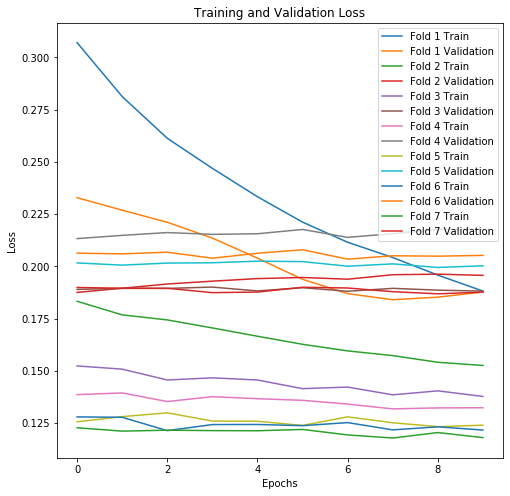

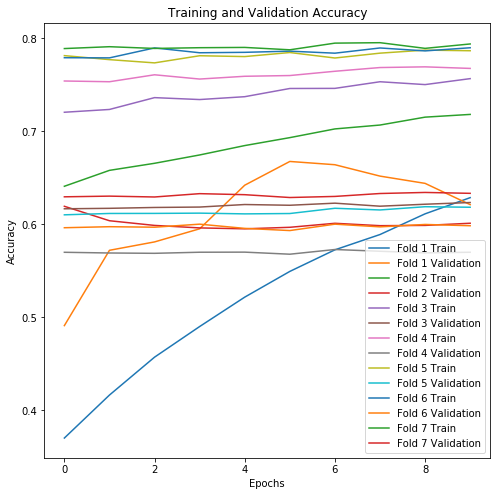

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
from sklearn.model_selection import KFold
import numpy as np
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping


# Initialize lists to store metrics for each fold
all_train_losses = []
all_val_losses = []
all_train_accuracies = []
all_val_accuracies = []



# Reshape target data to match the sequence length of the model output
y_train_reshaped = np.repeat(y_train[:, np.newaxis, :], 64, axis=1)
y_test_reshaped = np.repeat(y_test[:, np.newaxis, :], 64, axis=1)

# Print the shapes to verify
print("Shape of y_train_reshaped:", y_train_reshaped.shape)
print("Shape of y_test_reshaped:", y_test_reshaped.shape)



# Define the number of folds
k = 7  # You can adjust this number as needed

# Initialize k-fold cross-validation
kf = KFold(n_splits=k, shuffle=True, random_state=333)  # Set shuffle=True

# Iterate over each fold
for fold, (train_index, test_index) in enumerate(kf.split(X_train_acceleration)):
    print(f"Fold {fold + 1}/{k}")

    # Split data into train and test sets for this fold
    X_fold_train_acceleration, X_fold_test_acceleration = X_train_acceleration[train_index], X_train_acceleration[test_index]
    X_fold_train_heart_rate, X_fold_test_heart_rate = X_train_heart_rate[train_index], X_train_heart_rate[test_index]
    y_fold_train, y_fold_test = y_train_reshaped[train_index], y_train_reshaped[test_index]

    # Assuming you have already defined and compiled your model
    # Train the model
    history = model.fit(
        [X_fold_train_acceleration, X_fold_train_heart_rate],  # input data
        y_fold_train,  # target data
        batch_size=36,
        epochs=10,
        validation_data=([X_fold_test_acceleration, X_fold_test_heart_rate], y_fold_test),
        callbacks=callbacks
    )

    # Store training and validation metrics for this fold
    all_train_losses.append(history.history['loss'])
    all_val_losses.append(history.history['val_loss'])
    all_train_accuracies.append(history.history['accuracy'])
    all_val_accuracies.append(history.history['val_accuracy'])

# Plotting Loss
plt.figure(figsize=(8, 8))
for i in range(k):
    plt.plot(all_train_losses[i], label=f'Fold {i+1} Train')
    plt.plot(all_val_losses[i], label=f'Fold {i+1} Validation')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plotting Accuracy
plt.figure(figsize=(8, 8))
for i in range(k):
    plt.plot(all_train_accuracies[i], label=f'Fold {i+1} Train')
    plt.plot(all_val_accuracies[i], label=f'Fold {i+1} Validation')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()
